# Convolutional Neural Networks

## 1. What are Convolutional Neural Networks

- A neural network in which at least one layer is a convolutional layer and mainly ised for image
- Yann Lecun is considered the grandfather of Convolutional neural networks
- These are the layers of convolutional neural network where filters are applied to the original image.
- It includes Stride, ReLU Layer, Pooling, Flattening, Full Connection etc...various operations


## 2. Why CNNs were introduced when Fully connected ANNs were already there

- ANN is powerful technique for any single dimentional data identification but CNN is designed for multiple dimention like image data.-
- It preserve the dimentionality in the output to detect location of object in image and to highlite various regions of the image like edges, constant intensity regions, shades, etc
- So CNN is more benificaial and accurate for multi dimentional data

## 3. What is meant by the following terms: convolutional layer, pooling layer, padding, stride

# convolutional layer
- In this layer, we reduce the size of the image by passing the input image through a Feature Filter/Kernel
- It is to convert it into a Feature Map/ Convolved feature/ Activation Map
- It helps remove the unnecessary details from the image.
- Itc can be tuned to ger many feature maps (detects certain features from the image)
-  Involves element-wise multiplication of convolutional filter with the slice of an input matrix and finally the summation of all values in the resulting matrix.

# pooling layer
- It is to reduce the spatial size of the convolved feature 
- which decrease the computational power required to process the data
- Max Pooling - Returns the max value from the portion of the image covered by the kernel
- Average Pooling - Returns the average of all values from the portion of the image covered by the kernel.

# padding
- the convolutional layers reduce the size of the output
- So in cases where we want to increase the size of the output and save the information presented in the corners we can use padding layers where padding helps by adding extra rows and columns on the outer dimension of the images
- So the size of input data will remain similar to the output data
- Types
  - Same padding
  - Causal padding
  - Valid padding

# stride
- The number of pixels by which we are moving the filter over the input matrix is called a stride.

## 4. What would be the size of the output if input is n^2, filter is f^2 and stride is of s 

- n ^ 2 * f ^ 2 / s

## 5. What are pre-trained models and what do you mean by transfer learning

- Pre-trained model is a model created by some one else to solve a similar problem
- Instead of building a model from scratch to solve a similar problem, we use the model trained on other problem as a starting point
- Models
  - VGG-16
  - ResNet50
  - Inceptionv3
  - EfficientNet
- Transfer learning is the most popular approach in deep learning
- Deep learning required more computational power for training the models
- In this, we use pre-trained models as the starting point on computer vision
- It resolve the initial efforts for develop neural network models from scratch
- So one of layer is removed from exixting models and it can be fine tuned for specific applications.

## 6. Discuss CPU vs GPU vs TPU

- The CPU is the abbreviation for Central Processor Unit
- It is the unit that carries out major processing inside a computer for gereralised tasks
- The GPU is the abbreviation for Graphics Processing Unit
- It is specially designed to process graphics
- The Graphics processing unit (GPU) is used to generate image, videos and process them for better visuals
- The TPU is an abbreviation for Tensor Processing Unit
- It is a custom developed applications- specific integrated circuits (ASICs) by Google
- It is mainly used to spped up the process and handle excessive workloads to boost AI algorithms and calculations

## 7. Perform CNN classification on citrus leaves dataset from tensorflow 
##     (try to achieve minimum 90% accuracy and above on the test set)
##     Can be found using the link: https://www.tensorflow.org/datasets/catalog/citrus_leaves

In [65]:
!pip install tensorflow

In [66]:
!pip install tensorflow-datasets

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as ker
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [68]:
(Train,Test),Info = tfds.load("citrus_leaves",split=['train[:70%]', 'train[70%:]'],with_info=True,as_supervised=True,)

In [69]:
Train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [70]:
Test

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [71]:
Test.element_spec[0].shape

TensorShape([None, None, 3])

In [72]:
Info

tfds.core.DatasetInfo(
    name='citrus_leaves',
    version=0.1.1,
    description='The original citrus dataset contains 759 images of healthy and unhealthy citrus
fruits and leaves. However, for now we only export 594 images of citrus leaves
with the following labels: Black Spot, Canker, Greening, and Healthy. The
exported images are in PNG format and have 256x256 pixels.

NOTE: Leaf images with Melanose label were dropped due to very small count and
other non-leaf images being present in the same directory.

Dataset URL: https://data.mendeley.com/datasets/3f83gxmv57/2
License: http://creativecommons.org/licenses/by/4.0',
    homepage='https://data.mendeley.com/datasets/3f83gxmv57/2',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=4),
    }),
    total_num_examples=594,
    splits={
        'train': 594,
    },
    su

In [73]:
len(Train), len(Test)

(416, 178)

In [74]:
Info.name

'citrus_leaves'

In [75]:
Info.description

'The original citrus dataset contains 759 images of healthy and unhealthy citrus\nfruits and leaves. However, for now we only export 594 images of citrus leaves\nwith the following labels: Black Spot, Canker, Greening, and Healthy. The\nexported images are in PNG format and have 256x256 pixels.\n\nNOTE: Leaf images with Melanose label were dropped due to very small count and\nother non-leaf images being present in the same directory.\n\nDataset URL: https://data.mendeley.com/datasets/3f83gxmv57/2\nLicense: http://creativecommons.org/licenses/by/4.0'

In [76]:
NUM_CLASSES=Info.features['label'].num_classes
NUM_CLASSES

4

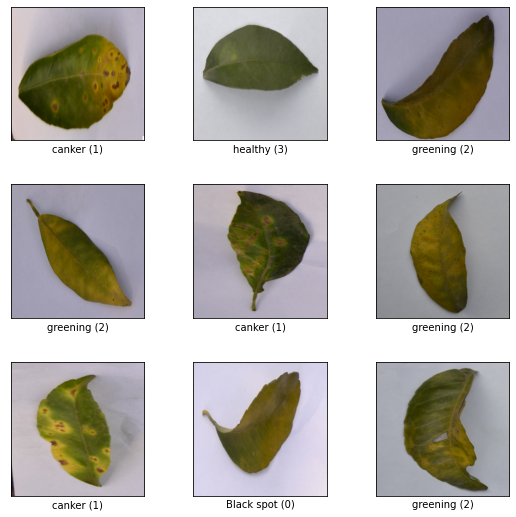

In [77]:
fig = tfds.show_examples(Train,Info)

In [78]:
IMAGE_SIZE = 240
BATCH_SIZE = 32

def Reshape_image(image, label):
  image = tf.image.resize(image,(IMAGE_SIZE, IMAGE_SIZE))/255.0
  return image, label

X_train= Train.shuffle(len(Train)//4).map(Reshape_image).batch(BATCH_SIZE).prefetch(1)

X_test = Test.map(Reshape_image).batch(BATCH_SIZE).prefetch(1)

print(X_train)
print(X_test)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [79]:
X_train.element_spec[1]

TensorSpec(shape=(None,), dtype=tf.int64, name=None)

In [80]:
import tensorflow_hub as hub
URL = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/classification/2"
HUB_model = hub.KerasLayer(URL,input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [81]:
# setting the batch size, epochs and number of classes
epo = 50
num_classes = NUM_CLASSES

In [82]:
HUB_model.trainable = True

In [83]:
# https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/classification/2

model = tf.keras.Sequential([HUB_model,tf.keras.layers.Dense(NUM_CLASSES)])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1000)              8212124   
                                                                 
 dense_2 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 8,216,128
Trainable params: 8,145,056
Non-trainable params: 71,072
_________________________________________________________________


In [84]:
# compiling the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [85]:
X_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [86]:
X_test

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [87]:
# training the model
model_train = model.fit(X_train, epochs = epo, validation_data =X_test)

Epoch 1/50
13/13 [==============================] - 28s 743ms/step - loss: 0.6909 - accuracy: 0.7716 - val_loss: 1.3740 - val_accuracy: 0.4045
Epoch 2/50
13/13 [==============================] - 8s 589ms/step - loss: 0.2054 - accuracy: 0.9231 - val_loss: 1.5537 - val_accuracy: 0.5337
Epoch 3/50
13/13 [==============================] - 8s 626ms/step - loss: 0.4291 - accuracy: 0.8966 - val_loss: 0.6381 - val_accuracy: 0.7472
Epoch 4/50
13/13 [==============================] - 8s 591ms/step - loss: 0.1422 - accuracy: 0.9471 - val_loss: 0.3829 - val_accuracy: 0.8876
Epoch 5/50
13/13 [==============================] - 8s 594ms/step - loss: 0.0929 - accuracy: 0.9639 - val_loss: 0.1776 - val_accuracy: 0.9270
Epoch 6/50
13/13 [==============================] - 8s 594ms/step - loss: 0.0711 - accuracy: 0.9808 - val_loss: 0.2600 - val_accuracy: 0.9382
Epoch 7/50
13/13 [==============================] - 8s 594ms/step - loss: 0.0709 - accuracy: 0.9688 - val_loss: 0.3454 - val_accuracy: 0.9213
Epoch

## 8. Plot the model architecture and explain how did you decide number of layers, filter size and other hyper parameters

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1000)              8212124   
                                                                 
 dense_2 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 8,216,128
Trainable params: 8,145,056
Non-trainable params: 71,072
_________________________________________________________________


In [ ]:
- I have read many articles about improvement in the model accuracy
- most of suggested to use already trained model
- So used tf hub for the same
- Even in case of manual design there is no perfect defined method
- model accuracy dependa on data set
- How ever majority model suggests to uncreas number of nodes gradually and finally net to required number of classes
- By minor changes in train image set, model can be trained for more accuracy like change in size, pixel values, rotate, flip etc

## 9. Increase the accuracy of the model in the demo file.

In [89]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, InputLayer
from sklearn.model_selection import train_test_split

In [90]:
# loading the fashion mnist dataset

#The Fashion-MNIST dataset is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

4431872/4422102 [==============================] - 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [91]:
# reshaping the data
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [92]:
# getting the pixel values between 0 and 1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.0
test_X = test_X / 255.0

In [93]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [94]:
# creating validation set
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2, random_state = 100)

In [97]:
# setting the batch size, epochs and number of classes
batch_size = 32
epochs = 50
num_classes = 10

# creating the network
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation = 'linear', input_shape=(28,28,1), padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2, 2), padding = 'same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
fashion_model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))                  
fashion_model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))                  
fashion_model.add(Dense(num_classes, activation = 'softmax'))

# compiling the model
fashion_model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])
filepath = "fashion_mnist-%i.hdf5"
# training the model
fashion_train = fashion_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label),callbacks=[
            tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
        ])

# model evaluation
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = 1)
print('Test accuracy:', test_eval[1])

Epoch 1/50
1497/1500 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.8467
Epoch 1: val_loss improved from inf to 0.30725, saving model to fashion_mnist-%i.hdf5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.4260 - accuracy: 0.8469 - val_loss: 0.3073 - val_accuracy: 0.8845
Epoch 2/50
1495/1500 [============================>.] - ETA: 0s - loss: 0.2728 - accuracy: 0.9012
Epoch 2: val_loss improved from 0.30725 to 0.25493, saving model to fashion_mnist-%i.hdf5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2727 - accuracy: 0.9012 - val_loss: 0.2549 - val_accuracy: 0.9051
Epoch 3/50
1500/1500 [==============================] - ETA: 0s - loss: 0.2273 - accuracy: 0.9157
Epoch 3: val_loss improved from 0.25493 to 0.23773, saving model to fashion_mnist-%i.hdf5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2273 - accuracy: 0.9157 - val_loss: 0.2377 - val_accuracy: 0.9121
Epoch 4/50
1498/1500 [=============

In [96]:
# setting the batch size, epochs and number of classes
batch_size = 32
epochs = 50
num_classes = 10

# creating the network
fashion_model = Sequential()
fashion_model.add(InputLayer(input_shape=(28,28,1)))
fashion_model.add(BatchNormalization())
fashion_model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Dropout(0.1))
fashion_model.add(Conv2D(64, (4, 4), activation='relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Dropout(0.3))
fashion_model.add(Flatten())
fashion_model.add(Dense(256, activation='relu'))
fashion_model.add(Dropout(0.5))
fashion_model.add(Dense(64, activation='relu'))
fashion_model.add(BatchNormalization())
fashion_model.add(Dense(num_classes, activation='softmax'))

# compiling the model
fashion_model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])
filepath = "fashion_mnist-%i.hdf5"
# training the model

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3, min_lr=0.0001)
earlystop=EarlyStopping(monitor='val_loss', patience=3)

fashion_train = fashion_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label),callbacks=[reduce_lr])

# model evaluation
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = 1)
print('Test accuracy:', test_eval[1])

Epoch 1/50
1500/1500 [==============================] - 19s 11ms/step - loss: 0.5886 - accuracy: 0.7923 - val_loss: 0.3282 - val_accuracy: 0.8783 - lr: 0.0010
Epoch 2/50
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3834 - accuracy: 0.8622 - val_loss: 0.3655 - val_accuracy: 0.8649 - lr: 0.0010
Epoch 3/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3438 - accuracy: 0.8776 - val_loss: 0.2714 - val_accuracy: 0.8999 - lr: 0.0010
Epoch 4/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3111 - accuracy: 0.8888 - val_loss: 0.2511 - val_accuracy: 0.9079 - lr: 0.0010
Epoch 5/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2904 - accuracy: 0.8947 - val_loss: 0.2432 - val_accuracy: 0.9108 - lr: 0.0010
Epoch 6/50
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2724 - accuracy: 0.9016 - val_loss: 0.2326 - val_accuracy: 0.9115 - lr: 0.0010
Epoch 7/50
1500/1500 [========================

# Accuracy increased from 91.8 to 93.45

In [98]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator( width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_X, train_label, batch_size)
steps_per_epoch = train_X.shape[0] // batch_size
rH = fashion_model.fit(train_generator, validation_data=(train_X, train_label), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 34s 22ms/step - loss: 0.4848 - accuracy: 0.8304 - val_loss: 0.1468 - val_accuracy: 0.9451
Epoch 2/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3577 - accuracy: 0.8701 - val_loss: 0.1556 - val_accuracy: 0.9423
Epoch 3/50
1500/1500 [==============================] - 38s 25ms/step - loss: 0.3204 - accuracy: 0.8825 - val_loss: 0.1785 - val_accuracy: 0.9337
Epoch 4/50
1500/1500 [==============================] - 38s 25ms/step - loss: 0.3054 - accuracy: 0.8872 - val_loss: 0.1738 - val_accuracy: 0.9358
Epoch 5/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2868 - accuracy: 0.8932 - val_loss: 0.1376 - val_accuracy: 0.9490
Epoch 6/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2789 - accuracy: 0.8948 - val_loss: 0.1591 - val_accuracy: 0.9408
Epoch 7/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2704 - accuracy: 0.8994 - val_loss: 0.1691 -

# Accuracy increased from 91.8 to 94.70

---



In [ ]:
#Furthre accuracy can be improved by next two blocks
data_generator = tf.keras.preprocessing.image.ImageDataGenerator( width_shift_range=0.1, height_shift_range=0.1, vertical_flip=True)
train_generator = data_generator.flow(train_X, train_label, batch_size)
steps_per_epoch = train_X.shape[0] // batch_size
rV = fashion_model.fit(train_generator, validation_data=(train_X, train_label), steps_per_epoch=steps_per_epoch, epochs=50)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator( width_shift_range=0.1, height_shift_range=0.1, vertical_flip=True,horizontal_flip=True)
train_generator = data_generator.flow(train_X, train_label, batch_size)
steps_per_epoch = train_X.shape[0] // batch_size
rHV = fashion_model.fit(train_generator, validation_data=(train_X, train_label), steps_per_epoch=steps_per_epoch, epochs=50)